<h1 align="center">SETTINGS</h1> 

<h2 align="center">STEP1: Geographical selection<h2>

In [1]:
# %matplotlib widget

# from Shapefile import subcountrymap

# import warnings
# warnings.filterwarnings('ignore')
# from matplotlib.collections import PatchCollection
# from matplotlib.widgets import Button, PolygonSelector, RectangleSelector
# from matplotlib.dates import DateFormatter
# from descartes import PolygonPatch 
# from matplotlib.path import Path as pltPath
# import matplotlib

# import ipywidgets
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import datetime as dt
# import geopandas as gpd
# from shapely.geometry import MultiPolygon, Polygon, MultiLineString, LinearRing, Point, box
# import shapely
# from pathlib import Path
# import yaml
# from io import BytesIO

# global TOTAL_CONFIG
# global DEFAULT_CONFIG_FILE

# TOTAL_CONFIG = {'geometry':'', 
#                 'specific_start_date':'',
#                 'specific_end_date' :'',
#                 'reference_date_start':'',
#                 'reference_date_end'  :'',
#                 'resolution'          :'',
#                 'variable'            :'',
#                 'plot_type'           :''}

# DEFAULT_CONFIG_FILE = r'/home/esowc32/PROJECT/DATA/code_config.yml'
# # DEFAULT_CONFIG_FILE = r"C:\Users\gio1r\Desktop\ECMWF_SoC_examples\PROJECT\DATA\code_config.yml"
# def chek_reply(reply):
#     if (reply == 'y') | (reply == 'Y') | (reply is None):
#         return True
#     elif (reply == 'n') | (reply=='N'):
#         return False
#     else:
#         print(f"\nYour reply was not clear, you inserted:'{reply}'.\nPlease insert 'Y' or press enter for YES, or 'n' for NO.\n")
#         return None

# def write_config(data = None, file = DEFAULT_CONFIG_FILE):
#     if data is None:
#         if TOTAL_CONFIG:
#             data = TOTAL_CONFIG.copy()
#     else:
#         data = data.copy()
#     answer = True
#     if data['geometry']!='':
#         data['geometry'], data['polygon_type'] = decompose_polygon_for_config(data['geometry'])
# #         if Path(file).exists():
# #             answer = None
# #             while answer is None:
# #                 check_user_before_overwrite = input(f'There is already a file stored in: {file}\nDo you want to overwrite? [Y]/n')
# #                 answer = chek_reply(check_user_before_overwrite)
#         # WRITE DOWN the config
#     if answer:
#         with open(file, 'w') as outfile:
#             yaml.dump(data, outfile, default_flow_style=None)
            
# def read_config(config_file = None):
    
#     if config_file is None:
#         config_file = DEFAULT_CONFIG_FILE
#     with open(config_file) as src:
#         dd = yaml.load(src,yaml.loader.FullLoader)
#     dd['geometry'] = recompose_polygon_for_config(dd['geometry'], dd['polygon_type'])
#     return dd

# def decompose_polygon_for_config(geom):
#     """Extracts coords of a Polygon or Multipolygon and returns a list of x,y coords 
#     (If MultiPolygon is a list of tuples, like:[(x,y),...]).
#     INPUTS:
#      - geom: Polygon or Multipoligon geometry
#     OUTPUTS:
#      - polxy: List of x,y of the decomposed Polygon (or list of tuples for Multipolygon).
#      """
#     if isinstance(geom, str):
#         return '',''
#     lines = geom.boundary
#     if isinstance(lines, MultiLineString):
#         mpolxy = []
#         for pol in lines:
#             mpolxy.append([list(r) for r in pol.xy])
#     else:
#         mpolxy = [list(r) for r in lines.xy]
#     if isinstance(geom, MultiPolygon):
#         polygon_type = 'multipolygon'
#     else:
#         polygon_type = 'singlepolygon'
        
#     return mpolxy, polygon_type

# def recompose_polygon_for_config(mpolxy, polygon_type):
#     """From list of x,y coords (If MultiPolygon is a list of tuples, like:[(x,y),...]) 
#     recompose a Polygon or Multipolygon.
#     INPUTS:
#      - polxy: List of x,y of the decomposed Polygon (or list of tuples for Multipolygon).
#     OUTPUTS:
#      - geom: Polygon or Multipoligon geometry
#      """
#     if (isinstance(mpolxy[0],tuple)) |(isinstance(mpolxy[0][0],list)):
#         all_pol = []
#         if polygon_type == 'multipolygon':
#             for xx,yy in mpolxy:
#                 all_pol.append([(xi,yi) for xi,yi in zip(xx,yy)])
#             geom = MultiPolygon([Polygon(s) for s in all_pol])
#         elif polygon_type == 'singlepolygon':
#             exterior = LinearRing([(xi,yi) for xi,yi in zip(mpolxy[0][0],mpolxy[0][1])])
#             interiors = []
#             for xx,yy in mpolxy[1::]:
#                 interiors.append(LinearRing([(xi,yi) for xi,yi in zip(xx,yy)]))
#             geom = Polygon(exterior, interiors)
#     else:
#         geom = Polygon([(xi,yi) for xi,yi in zip(mpolxy[0],mpolxy[1])])
#     return geom


# class geo_selection():
#     def __init__(self, fig, ax, countries, continents):
#         self.fig = fig
#         self.ax  = ax
#         self.countries = countries
#         self.continents = continents
#         self.cids = None
#         self.poly = None
#         self.xlims = (-180,180)
#         self.ylims = (-90,90)
        
#     def disconnect_cids(self):
#         if self.cids is not None:
#             if isinstance(self.cids, list):
#                 for single_cid in self.cids:
#                     self.fig.canvas.mpl_disconnect(single_cid)
#             else:
#                 self.fig.canvas.mpl_disconnect(self.cids)
#         if self.poly is not None:
#             self.poly.disconnect_events()
#             self.fig.canvas.draw_idle()
#         self.ax.cla()
#         self.basic_plot()
#         self.lnx[0].set_linestyle('None')
#         self.lny[0].set_linestyle('None')
#         return []
    
#     def basic_plot(self):
#         #prepare cursor lines
#         self.lnx = self.ax.plot([60,60], [0,1.5], color='black', linewidth=0.3)
#         self.lny = self.ax.plot([0,100], [1.5,1.5], color='black', linewidth=0.3)
#         self.lnx[0].set_linestyle('None')
#         self.lny[0].set_linestyle('None')
#         #prepare annotations
#         self.text = self.ax.annotate('COUNTRY: ',xy = (.4,.025), xycoords = 'figure fraction', annotation_clip = False)
#         self.text.set_alpha(0)
#         return self.fig

#     def create_visual(self):
#         #plot border of the countries
#         [self.ax.add_patch(PolygonPatch(cc, fc = 'w', ec = 'k')) for cc in self.countries.geometry]
#         self.ax.set_xlim(self.xlims)
#         self.ax.set_ylim(self.ylims)
#         self.basic_plot()
#         #buttons
#         ## CREATE BUTTONS
#         axb1 = plt.axes([0.73, 0.85, 0.15, 0.085])
#         axb2 = plt.axes([0.53, 0.85, 0.15, 0.085])
#         axb3 = plt.axes([0.33, 0.85, 0.15, 0.085])
#         axb4 = plt.axes([0.13, 0.85, 0.15, 0.085])
#         self.b1 = Button(axb1, 'BoundingBox')
#         self.b2 = Button(axb2, 'Polygon')
#         self.b3 = Button(axb3, 'Countries')
#         self.b4 = Button(axb4, 'Continents')
#         ## ACTIVATE BUTTONS
# #         b1.on_clicked(callback.next)
#         self.b4.on_clicked(self.select_continents)
#         self.b3.on_clicked(self.select_countries)
#         self.b2.on_clicked(self.select_polygon)
#         self.b1.on_clicked(self.select_boundingbox)
        
#     def hover_countries(self, event):        
#         #cross lines
#         self.lnx[0].set_data([event.xdata, event.xdata], [-90, 90])
#         self.lnx[0].set_linestyle('--')
#         self.lny[0].set_data([-180,180], [event.ydata, event.ydata])
#         self.lny[0].set_linestyle('--')
#         #change country's facecolor when hoovering over
#         ints = self.countries[self.countries.intersects(Point(event.xdata,event.ydata))]
#         if len(ints)==1:
#             color = ints.ax_patch.iloc[0].get_facecolor()
#             if (color != (1,0,0,1)) & (color != (0,1,1,1)): 
#                 [axsing.set_facecolor('w') for axsing in self.countries.ax_patch.values if axsing.get_facecolor()==(0,1,1,1)]
#                 ints.ax_patch.iloc[0].set_facecolor('cyan')
#                 self.text.set_text(f'COUNTRY: {ints.name.iloc[0]}')
#                 self.text.set_alpha(1)
# #         self.fig.canvas.blit()
#         self.fig.canvas.draw_idle()
    
#     def click_countries(self, event):
#         #change country's facecolor when hoovering over
#         ints = self.countries[self.countries.intersects(Point(event.xdata,event.ydata))]
#         if len(ints)==1:
#             [axsing.set_facecolor('w') for axsing in self.countries.ax_patch.values if axsing.get_facecolor()==(1,0,0,1)]
#             ints.ax_patch.iloc[0].set_facecolor('red')
#             #write down Polygon
#             geom = ints.geometry.values[0]
#             TOTAL_CONFIG.update({'geometry':geom, 'polygon_type':'polygon'})
#             write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
# #         self.fig.canvas.blit()
#         self.fig.canvas.draw_idle()
    
#     def select_countries(self, event):
#         self.xlims = self.ax.get_xlim()
#         self.ylims = self.ax.get_ylim()
#         self.cids = self.disconnect_cids()
#         self.countries['patches']   = [PolygonPatch(cc, fc = 'w', ec = 'k') for cc in self.countries.geometry]
#         self.countries['ax_patch']  = [ax.add_patch(pp) for pp in self.countries.patches]
#         self.ax.set_xlim(self.xlims)
#         self.ax.set_ylim(self.ylims)
#         self.text.set_alpha(0)
#         cid1 = self.fig.canvas.mpl_connect("motion_notify_event", self.hover_countries)
#         cid2 = self.fig.canvas.mpl_connect("button_press_event",  self.click_countries)
#         self.cids = [cid1, cid2]

#     def hover_continents(self, event):        
#         #cross lines
#         self.lnx[0].set_data([event.xdata, event.xdata], [-90, 90])
#         self.lnx[0].set_linestyle('--')
#         self.lny[0].set_data([-180,180], [event.ydata, event.ydata])
#         self.lny[0].set_linestyle('--')
#         #change country's facecolor when hoovering over
#         ints = self.continents[self.continents.intersects(Point(event.xdata,event.ydata))]
#         if len(ints)==1:
#             color = ints.ax_patch.iloc[0].get_facecolor()
#             if (color != (1,0,0,1)) & (color != (0,1,1,1)): 
#                 [axsing.set_facecolor('w') for axsing in self.continents.ax_patch.values if axsing.get_facecolor()==(0,1,1,1)]
#                 ints.ax_patch.iloc[0].set_facecolor('cyan')
#                 self.text.set_text(f'CONTINENT: {ints.index.values[0]}')
#                 self.text.set_alpha(1)
# #         self.fig.canvas.blit()
#         self.fig.canvas.draw_idle()
    
#     def click_continents(self, event):
#         #change country's facecolor when hoovering over
#         ints = self.continents[self.continents.intersects(Point(event.xdata,event.ydata))]
#         if len(ints)==1:
#             [axsing.set_facecolor('w') for axsing in self.continents.ax_patch.values if axsing.get_facecolor()==(1,0,0,1)]
#             ints.ax_patch.iloc[0].set_facecolor('red')
#             #write down Polygon
#             geom = ints.geometry.values[0]
#             TOTAL_CONFIG.update({'geometry':geom, 'polygon_type':'polygon'})
#             write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
# #         self.fig.canvas.blit()
#         self.fig.canvas.draw_idle()
            
#     def select_continents(self, event):
#         self.xlims = self.ax.get_xlim()
#         self.ylims = self.ax.get_ylim()
#         self.cids = self.disconnect_cids()
#         self.continents['patches']   = [PolygonPatch(cc, fc = 'w', ec = 'k') for cc in self.continents.geometry]
#         self.continents['ax_patch']  = [ax.add_patch(pp) for pp in self.continents.patches]
#         self.ax.set_xlim(self.xlims)
#         self.ax.set_ylim(self.ylims)
# #         self.text = self.ax.annotate('CONTINENT: ',xy = (.4,.025), xycoords = 'figure fraction', annotation_clip = False)
#         self.text.set_alpha(0)
#         cid1 = self.fig.canvas.mpl_connect("motion_notify_event", self.hover_continents)
#         cid2 = self.fig.canvas.mpl_connect("button_press_event",  self.click_continents)
#         self.cids = [cid1, cid2]        
        
# #     def onselect(self, event):
# #         TOTAL_CONFIG.update({'geometry':ints.geometry.values[0]})
# #         write_config()
# #         self.fig.canvas.draw_idle()
#     @staticmethod            
#     def onselect(event):
# #         print('OK')
#         #write down Polygon
#         geom = Polygon(event)
#         TOTAL_CONFIG.update({'geometry':geom,
#                             'polygon_type':'singlepolygon'})
#         write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
# #         geo.ax.set_facecolor('g')
# #         geo.fig.canvas.draw_idle()
        
#     def select_polygon(self, event):
#         self.xlims = self.ax.get_xlim()
#         self.ylims = self.ax.get_ylim()
#         self.cids = self.disconnect_cids()
#         [self.ax.add_patch(PolygonPatch(cc, fc = 'w', ec = 'k')) for cc in self.countries.geometry]
#         self.ax.set_xlim(self.xlims)
#         self.ax.set_ylim(self.ylims)
#         self.poly = PolygonSelector(self.ax, self.onselect, useblit=True)
#         self.text.set_text(f"Press 'ESC' to restart the Polygon, hold 'SHIFT' to move Polygon with cursor")
#         self.text.set_position((.1, .025))
#         self.text.set_alpha(1)
    
#     @staticmethod  
#     def line_select_callback(eclick, erelease):
        
#         'eclick and erelease are the press and release events'
#         x1, y1 = eclick.xdata, eclick.ydata
#         x2, y2 = erelease.xdata, erelease.ydata
# #         #write down Polygon
#         geom = shapely.geometry.box(x1,y1,x2,y2)
#         TOTAL_CONFIG.update({'geometry':geom,'polygon_type':'singlepolygon'})
# #         TOTAL_CONFIG.update({'geometry':'e','polygon_type':'singlepolygon'})
#         write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
# #         geo.ax.set_facecolor('g')
# #         print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
# #         print(" The button you used were: %s %s" % (eclick.button, erelease.button))
# #         self.fig.canvas.draw_idle()
        
#     def select_boundingbox(self, event):
#         self.xlims = self.ax.get_xlim()
#         self.ylims = self.ax.get_ylim()
#         self.cids = self.disconnect_cids()
#         [self.ax.add_patch(PolygonPatch(cc, fc = 'w', ec = 'k')) for cc in self.countries.geometry]
#         self.ax.set_xlim(self.xlims)
#         self.ax.set_ylim(self.ylims)
#         self.poly = RectangleSelector(self.ax, self.line_select_callback,
#                                       drawtype='box',
#                                       useblit=True,
#                                       button=[1, 3],  # don't use middle button
#                                       minspanx=5, minspany=5,
#                                       spancoords='pixels',
#                                       interactive=True)
        
#         self.fig.canvas.toolbar.release_zoom(event)
        
#         self.fig.canvas.draw_idle()

        
        
# if Path(DEFAULT_CONFIG_FILE).exists():
#     TOTAL_CONFIG = read_config()
#     set_default_values = True
# else:
#     set_default_values = False
        
# #     self.countries['patches']   = [PolygonPatch(cc, fc = 'w', ec = 'k') for cc in countries.geometry]
# #     self.countries['ax_patch']  = [ax.add_patch(pp) for pp in countries.patches]
# fig, ax = plt.subplots(figsize = (8,4))
# fig.suptitle('Choose what and then select in the figure:')
# plt.subplots_adjust(top=0.8)
# ax.set_xlim(-180,180)
# ax.set_ylim(-90,90)
# # countries  = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).sort_values('name')
# # countries.index = countries.name
# # continents = countries.dissolve('continent')
# # continents.index = [f.upper() for f in continents.index]

# url_to_download    = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_map_units.zip"#"https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_50m_admin_0_countries.zip"
# file_path_location = "/home/esowc32/PROJECT/DATA/shapefiles/PROCESSED_ne_110m_admin_0_map_units.zip" 
# # file_path_location = r"C:\Users\gio1r\Desktop\ECMWF_SoC_examples\PROJECT\DATA\shapefiles\PROCESSED_ne_110m_admin_0_map_units.zip"

# sbcm = subcountrymap(file_path_location = file_path_location, url_to_download = url_to_download)
# countries  = sbcm.shapefile.copy()
# countries.index = countries.GEOUNIT
# countries['name'] = countries.GEOUNIT
# continents = sbcm.continent_shapefile.copy()
# continents.index = [f.upper() for f in continents.index]
# continents['continent']= [f.upper() for f in continents.index]

# all_shapes = pd.concat([countries, continents])[['geometry','continent']]

# geo = geo_selection(fig, ax, countries, continents)
# geo.create_visual()

# def plot_countries(country):
#     [ax.add_patch(PolygonPatch(cc, fc = 'w', ec = 'k')) for cc in all_shapes.geometry]
#     rr = all_shapes[all_shapes.index == country]
#     if len(rr)>0:
#         ax.add_patch(PolygonPatch(rr.geometry.values[0], fc = 'r', ec = 'k'))
#         xmin, ymin, xmax,ymax = continents.loc[rr['continent'].values[0].upper()].geometry.bounds
#         ax.set_xlim(xmin, xmax)
#         ax.set_ylim(ymin, ymax)
#         geom = rr.geometry.iloc[0]
#         TOTAL_CONFIG.update({'geometry':geom,
#                     'polygon_type':'singlepolygon'})
#         write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
        
        
#     geo.fig.canvas.draw_idle()
# #         bounds = rr.geometry.buffer(0.2).values[0]
        
# print("""There are different ways to mask a geographical selection:
# 1 - write or select COUNTRY/CONTINENT from dropdown list (the selections will appear in the map).
# 2 - from the map FIRST Choose how to select area (continent, country, polygon or Boundingbox), 
#     THEN select in the map.
#       """)

# cmbox1 = ipywidgets.Combobox(options=list(sbcm.continent_shapefile.index),
#                              placeholder='CONTINENT: Write down or choose',
#                              description=" ",
#                              layout={'width': 'initial','description_width': 'initial'})
# list_countries = sbcm.shapefile.GEOUNIT.values

# cmbox2 = ipywidgets.Combobox(options=list(list_countries),
#                          placeholder='COUNTRY: Write down or choose',
#                          description=" ",
#                          layout={'width': 'initial','description_width': 'initial'})

# def update_cmbox2_and_plot(continent):
#     # UPDATE
#     list_countries = list(sbcm.shapefile[sbcm.shapefile.continent ==continent].GEOUNIT.values)
#     cmbox2.options = list_countries
#     #PLOT
#     continent = continent.upper()
#     geo.disconnect_cids()
#     geo.create_visual()#[ax.add_patch(PolygonPatch(cc, fc = 'w', ec = 'k')) for cc in all_shapes.geometry]
#     rr = all_shapes[all_shapes.index == continent]
#     if len(rr)>0:
#         ax.add_patch(PolygonPatch(rr.geometry.values[0], fc = 'r', ec = 'k'))
#         xmin, ymin, xmax,ymax = continents.loc[rr['continent'].values[0].upper()].geometry.bounds
#         ax.set_xlim(xmin, xmax)
#         ax.set_ylim(ymin, ymax)
#         geom = rr.geometry.iloc[0]
#         TOTAL_CONFIG.update({'geometry':geom,
#                     'polygon_type':'singlepolygon'})
#         write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
#     geo.fig.canvas.draw_idle()
        
# def plot_cmbox2(country):
#     #PLOT
#     geo.disconnect_cids()
#     geo.create_visual()#[ax.add_patch(PolygonPatch(cc, fc = 'w', ec = 'k')) for cc in all_shapes.geometry]
#     rr = all_shapes[all_shapes.index == country]
#     if len(rr)>0:
#         ax.add_patch(PolygonPatch(rr.geometry.values[0], fc = 'r', ec = 'k'))
#         xmin, ymin, xmax,ymax = continents.loc[rr['continent'].values[0].upper()].geometry.bounds
#         ax.set_xlim(xmin, xmax)
#         ax.set_ylim(ymin, ymax)
#         geom = rr.geometry.iloc[0]
#         TOTAL_CONFIG.update({'geometry':geom,
#                     'polygon_type':'singlepolygon'})
#         write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
#     geo.fig.canvas.draw_idle()

# inte1 = ipywidgets.interactive(update_cmbox2_and_plot, continent = cmbox1)
# inte2 = ipywidgets.interactive(plot_cmbox2, country = cmbox2)
# display(inte1)
# display(inte2)
# # display(cmbox2)


# # cmbox1 = ipywidgets.Combobox(options=list(all_shapes.index),
# #                              placeholder='COUNTRY/CONTINENT: Write down or choose',
# #                              description=" ",
# #                              layout={'width': 'initial',
# #                                      'description_width': 'initial'})
# # inter = ipywidgets.interact(plot_countries, country = cmbox1)

# # txt =ipywidgets.Text(
# # #         value='shapefile path',
# #         placeholder='write down the path for the shape to be loaded',
# #         description='shapefile:',
# #         disabled=False,
# #         layout = ipywidgets.Layout( description_width = 'flex')
# #     )
# # def find_file(uploader):
# # #     gpd.read_file(change.content.tobytes())
# #     file = Path(uploader.owner.value)
# #     if file.exists():
# #         try:
# #             shape = gpd.read_file(file)
# #             print(file)
# #             txt.disabled = True
# #             geo.disconnect_cids()
# #             geo.create_visual()
# #             for kk,rr in shape.iterrows():
# #                 ax.add_patch(PolygonPatch(rr.geometry, fc = 'r', ec = 'r'))
                
# #             #re-establsh ax limits
# #             ax.set_xlim(-180,180)
# #             ax.set_ylim(-90,90)
# #             # DISABLE all buttons
# #             geo.b1.set_active(False)
# #             geo.b2.set_active(False)
# #             geo.b3.set_active(False)
# #             geo.b4.set_active(False)
# #         except Exception as e:
# #             print(e)
# #             txt.disabled = False
# #     else:
# #         txt.disabled = False
# #         return
# # # print(files)
# # txt.observe(find_file,names='value')
# # display(txt)

# uploader = ipywidgets.FileUpload(multiple = True,
#                            placeholder='write down the path for the shape to be loaded',
#                            description='upload shapefile:',
#                            layout={'width': 'initial','description_width': 'initial'},
#                           )
# def read_shape_from_uploader(event):
#     list_allowed_extensions = ['zip','geojson','shp','kml', 'kmz', 'gpkg']
#     for kk,val in event.new.items():
#         for kk1, val1 in val.items():
#             if kk1 =='metadata':
#                 for kk2,val2 in val1.items():
#                     if kk2=='name':
#                         extension = val2.split('.')[-1]
#                         if extension in list_allowed_extensions:
#                             shp = gpd.read_file(BytesIO(val['content']))
#                             print(f'{val2} successfully loaded\n\n')
#                             uploader.disabled = True
#                             # DRAW it on the map
#                             geo.disconnect_cids()
#                             geo.create_visual()
#                             for kk,rr in shp.iterrows():
#                                 ax.add_patch(PolygonPatch(rr.geometry, fc = 'r', ec = 'r'))
#                             #re-establsh ax limits
#                             ax.set_xlim(-180,180)
#                             ax.set_ylim(-90,90)
#                             # DISABLE all buttons
#                             geo.b1.set_active(False)
#                             geo.b2.set_active(False)
#                             geo.b3.set_active(False)
#                             geo.b4.set_active(False)
#                             TOTAL_CONFIG.update({'geometry':shp.dissolve().geometry[0],
#                                                  'polygon_type':'singlepolygon'})
#                             write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
#                             geo.fig.canvas.draw_idle()
#                         else:
#                             print(f"file {val2} with extension {extension} NOT allowed.\nPlease upload a file with one of the following extension {list_allowed_extensions}\n")
                        
    
# uploader.observe(read_shape_from_uploader, 'value')
# # insert upload button at the center
# box_layout = ipywidgets.Layout(display='flex',
#                 flex_flow='column',
#                 align_items='center',
#                 width='35%')
# box = ipywidgets.HBox(children=[uploader],layout=box_layout)

# display(box)
# if set_default_values:
#     ax.add_patch(PolygonPatch(TOTAL_CONFIG['geometry'], fc = 'r', ec = 'k', alpha = 0.6))
# # C:\Users\gio1r\Desktop\ECMWF_SoC_examples\DATA\shapefiles\examples\example_selection.geojson
# # C:\Users\gio1r\Desktop\ECMWF_SoC_examples\DATA\shapefiles\examples\example_selection2.geojson

In [2]:
import ipywidgets as ipywd
# import time
# import sys
# from matplotlib.dates import DateFormatter
import base64
import hashlib
from typing import Callable
from IPython.display import HTML, display, FileLink


out = ipywd.Output()
display(out)

class DownloadButton(ipywd.Button):
    
    """Download button with dynamic content

    The content is generated using a callback when the button is clicked.
    """
    
    """This code is originally from 'ollik1', 
    posted in https://stackoverflow.com/questions/61708701/how-to-download-a-file-using-ipywidget-button
    
    on Aug 6, 2021
    """
    def __init__(self, filename: str, contents: Callable[[], str], **kwargs):
        super(DownloadButton, self).__init__(**kwargs)
        self.filename = filename
        self.contents = contents
        self.on_click(self.__on_click)

    def __on_click(self, b):
        contents: bytes = self.contents().encode('utf-8')
        b64 = base64.b64encode(contents)
        payload = b64.decode()
        digest = hashlib.md5(contents).hexdigest()  # bypass browser cache
        id = f'dl_{digest}'
        with out:
            display(HTML(f"""
<html>
<body>
<a id="{id}" download="{self.filename}" href="data:text/csv;base64,{payload}" download>
</a>

<script>
(function download() {{
document.getElementById('{id}').click();
}})()
</script>

</body>
</html>
"""))

Output()

In [3]:
import pandas as pd

In [4]:
# general imports
import ipyleaflet as ipylf
import ipywidgets as ipywd
from traitlets import link

import geopandas as gpd
import pandas as pd
from pathlib import Path
from shapely.geometry import Polygon, MultiPolygon, box, MultiLineString, LinearRing
from shapely.ops import unary_union
from io import BytesIO
import json
import yaml

global DEFAULT_CONFIG_FILE
global TOTAL_CONFIG

#local imports
from Shapefile import subcountrymap

###########################################################################################################
# Prepare configuration dictionary / file
###########################################################################################################
DEFAULT_CONFIG_FILE = r'/home/esowc32/PROJECT/DATA/code_config.yml'
TOTAL_CONFIG = {'geometry':'',
                'aggregating_operation':'',
                'specific_start_date':'',
                'specific_end_date' :'',
                'reference_date_start':'',
                'reference_date_end'  :'',
                'resolution'          :'',
                'variable'            :'',
                'plot_type'           :''}

def decompose_polygon_for_config(geom):
    """Extracts coords of a Polygon or Multipolygon and returns a list of x,y coords 
    (If MultiPolygon is a list of tuples, like:[(x,y),...]).
    INPUTS:
     - geom: Polygon or Multipoligon geometry
    OUTPUTS:
     - polxy: List of x,y of the decomposed Polygon (or list of tuples for Multipolygon).
     """
    if isinstance(geom, str):
        return '',''
    lines = geom.boundary
    if isinstance(lines, MultiLineString):
        mpolxy = []
        for pol in lines.geoms:
            mpolxy.append([list(r) for r in pol.xy])
    else:
        mpolxy = [list(r) for r in lines.xy]
    if isinstance(geom, MultiPolygon):
        polygon_type = 'multipolygon'
    else:
        polygon_type = 'singlepolygon'
        
    return mpolxy, polygon_type

def recompose_polygon_for_config(mpolxy, polygon_type):
    """From list of x,y coords (If MultiPolygon is a list of tuples, like:[(x,y),...]) 
    recompose a Polygon or Multipolygon.
    INPUTS:
     - polxy: List of x,y of the decomposed Polygon (or list of tuples for Multipolygon).
    OUTPUTS:
     - geom: Polygon or Multipoligon geometry
     """
    if (isinstance(mpolxy[0],tuple)) |(isinstance(mpolxy[0][0],list)):
        all_pol = []
        if polygon_type == 'multipolygon':
            for xx,yy in mpolxy:
                all_pol.append([(xi,yi) for xi,yi in zip(xx,yy)])
            geom = MultiPolygon([Polygon(s) for s in all_pol])
        elif polygon_type == 'singlepolygon':
            exterior = LinearRing([(xi,yi) for xi,yi in zip(mpolxy[0][0],mpolxy[0][1])])
            interiors = []
            for xx,yy in mpolxy[1::]:
                interiors.append(LinearRing([(xi,yi) for xi,yi in zip(xx,yy)]))
            geom = Polygon(exterior, interiors)
    else:
        geom = Polygon([(xi,yi) for xi,yi in zip(mpolxy[0],mpolxy[1])])
    return geom

def add_geometry(data = None, additional_geometry = None):
    if additional_geometry is None:
        return
    if data is None:
        if TOTAL_CONFIG:
            data = TOTAL_CONFIG.copy()
    else:
        data = data.copy()
    if isinstance(data['geometry'],str): # if it is a string it means it is empty
        new_geom = additional_geometry
    else:
        new_geom = unary_union([data['geometry'], additional_geometry])
    return new_geom

def chek_reply(reply):
    if (reply == 'y') | (reply == 'Y') | (reply is None):
        return True
    elif (reply == 'n') | (reply=='N'):
        return False
    else:
        print(f"\nYour reply was not clear, you inserted:'{reply}'.\nPlease insert 'Y' or press enter for YES, or 'n' for NO.\n")
        return None

    
def write_config(data = None, file = DEFAULT_CONFIG_FILE):
    if data is None:
        if TOTAL_CONFIG:
            data = TOTAL_CONFIG.copy()
    else:
        data = data.copy()
    answer = True
    if data['geometry']!='':
        data['geometry'], data['polygon_type'] = decompose_polygon_for_config(data['geometry'])
        
    # WRITE DOWN the config
    if answer:
        with open(file, 'w') as outfile:
            yaml.dump(data, outfile, default_flow_style=None)
    # activate download button
    download_shapefile() 

def read_config(config_file = None):    
    if config_file is None:
        config_file = DEFAULT_CONFIG_FILE
    with open(config_file) as src:
        dd = yaml.load(src,yaml.loader.FullLoader)
    if not isinstance(dd['geometry'], str):
        dd['geometry'] = recompose_polygon_for_config(dd['geometry'], dd['polygon_type'])
    return dd

if Path(DEFAULT_CONFIG_FILE).exists():
    TOTAL_CONFIG = read_config()
    set_default_values = True
    if TOTAL_CONFIG['geometry']=='':
        set_default_values = False
else:
    set_default_values = False

###########################################################################################################
# COMMON STYLES
###########################################################################################################
hover_style = {"fillColor": "#40E0D0", "fillOpacity": 0.5}
default_style = {
        "color": "black",
        "fillColor": "#366370",
        "opacity": 0.05,
        "weight": 1.9,
        "dashArray": "2",
        "fillOpacity": 0.6}
click_style = {"color": "#40E0D0",
            "fillColor": "red",#"#366370",
#             "opacity": 0.4,
            "weight": 3,
#             "dashArray": "3",
            "fillOpacity": 0.2}
###########################################################################################################
# Create Map
###########################################################################################################
m = ipylf.Map(center=(28.6019917, 70.9121356), zoom=2, basemap=ipylf.basemaps.Esri.WorldTopoMap, scroll_wheel_zoom = True)

def delete_all_additional_layers():
    dc.clear()
    for ll in m.layers:
        if (ll.name=='Selected country') | (ll.name=="Selected continent") | (ll.name=='old shp'):
            m.remove_layer(ll)
        elif ll.name == 'shp uploaded':
            m.remove_layer(ll)
            uploader.metadata.clear()
            uploader.data.clear()
            uploader.value.clear()
            uploader._counter = 0
    
###########################################################################################################
# Add shapefile countries
###########################################################################################################
# countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

url_to_download    = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_map_units.zip"#"https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_50m_admin_0_countries.zip"
# url_to_download    = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_map_subunits.zip"

# file_path_location = "/home/esowc32/PROJECT/DATA/shapefiles/PROCESSED_ne_110m_admin_0_map_units.zip"
# file_path_location = '/home/esowc32/PROJECT/DATA/shapefiles/PROCESSED2_ne_10m_admin_0_map_subunits.geojson' 
file_path_location = '/home/esowc32/PROJECT/DATA/shapefiles/personalized_from_ne_110m_admin_0_map_units.geojson'

        
sbcm = subcountrymap(file_path_location = file_path_location, url_to_download = url_to_download)
countries  = sbcm.shapefile.copy()
countries.index = countries.GEOUNIT
countries['name'] = countries.GEOUNIT
continent_shapefile = sbcm.continent_shapefile.copy()
all_shapes = pd.concat([countries, continent_shapefile])[['geometry','continent']]
# continent_shapefile.index = [f.upper() for f in continents.index]
# continents['continent']= [f.upper() for f in continents.index]

geo_data = ipylf.GeoData(
    geo_dataframe=countries,
    style=default_style,
    hover_style= hover_style,
    name="Countries")
m.add_layer(geo_data)

html =  ipywd.HTML("""Hover over a state""")
html.layout.margin = "0px 20px 20px 20px"
control =  ipylf.WidgetControl(widget=html, position="topright")
m.add_control(control)

def update_html(feature, **kwargs):
    html.value = """
        <h4><b>{}</b></h4>
        <h5>Continent: {}</h5>
    """.format(
        feature["properties"]["NAME_EN"],
        feature["properties"]["continent"],
    )
    
def underline_shape(feature, **kwargs):
    selected_layer = ipylf.GeoJSON(
                        data=feature,
                        name="Selected country",
                        hover_style=hover_style,
                        style=click_style)
    m.add_layer(selected_layer)
    # write it in config file
    new_geom = unary_union(list(gpd.GeoDataFrame.from_features([feature]).geometry.values))
    TOTAL_CONFIG.update({'geometry': add_geometry(additional_geometry=new_geom)})
    write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
    
geo_data.on_click(underline_shape)
geo_data.on_hover(update_html)

# underline previous selection (if present in the configuraton file)
if set_default_values:
    geo_update = ipylf.GeoData(
        geo_dataframe=gpd.GeoDataFrame(geometry = [TOTAL_CONFIG['geometry']]),
        style=click_style,
        name="old shp"
    )
    m.add_layer(geo_update)

###########################################################################################################
# Add control buttons and additional commands
###########################################################################################################
## 1. Cancel shapes command
button_clear_selection = ipywd.Button(value=False,
                                      description='',
                                      disabled=False,
                                      button_style='', # 'success', 'info', 'warning', 'danger' or ''
                                      tooltip='Click to clear all the shapes',
                                      icon='trash', # (FontAwesome names without the `fa-` prefix)
                                      layout = ipywd.Layout(display='center',flex_flow='column',align_items='center',width='8mm')
                                     )
## 2. Upload shapes command
uploader = ipywd.FileUpload(multiple = True,
                            description='Upload shp',
                            style = {'description_width': 'initial'},
                            tooltip='select shapefile to load from local',
#                             layout = ipywd.Layout( display='center', flex_flow='column', align_items='center', width='18mm')
                           )

## 3. Download shapes command
db_shp = DownloadButton(filename='example.geojson', contents=lambda: None, 
                        disabled = True, 
                        description='Download shp',
                        style = {'description_width': 'initial'},
                        tooltip = 'download shp in GeoJSON format',
                        icon    = 'download', 
                       )

## 4. Refresher
refresher = ipywd.Button(value=False,
                       description='',
                       disabled=False,
                       button_style='', # 'success', 'info', 'warning', 'danger' or ''
                       tooltip='Click to refresh (dissolve shapes into one)',
                       icon='object-ungroup', # (FontAwesome names without the `fa-` prefix)
                       layout = ipywd.Layout(display='center',flex_flow='column',align_items='center',width='8mm')
                      )

def handle_draw(target, action, geo_json):
    if (action == 'created') | (action =='edited'):
        # write it in config file
        new_geom = unary_union(list(gpd.GeoDataFrame.from_features([geo_json]).geometry.values))
        TOTAL_CONFIG.update({'geometry': add_geometry(additional_geometry=new_geom)})
        write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
    elif action == 'deleted':
        delete_all_additional_layers()
        # clear geometry from config
        TOTAL_CONFIG.update({'geometry':'','polygon_type':''})
        write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
                
def clear_selection_click(event):
    delete_all_additional_layers()
    # clear geometry from config
    TOTAL_CONFIG.update({'geometry':'','polygon_type':''})
    write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
            
def read_shape_from_uploader(event):
    """Load the shapefile selected into memory and show it in the map"""
    list_allowed_extensions = ['zip','geojson','shp','kml', 'kmz', 'gpkg']
    for kk,val in event.new.items():
        for kk1, val1 in val.items():
            if kk1 =='metadata':
                for kk2,val2 in val1.items():
                    if kk2=='name':
                        extension = val2.split('.')[-1]
                        # check the extension of the file
                        if extension in list_allowed_extensions:
                            # read the uploaded file
                            shp = gpd.read_file(BytesIO(val['content']))
#                             print(f'{val2} successfully loaded\n\n')
#                             uploader.disabled = True
                            # DRAW it on the map
                            geo_update = ipylf.GeoData(
                                geo_dataframe=shp,
                                style=click_style,
                                name="shp uploaded"
                            )
                            m.add_layer(geo_update)
                            # write it in config file
                            new_geom = unary_union(list(shp.geometry.values))
                            TOTAL_CONFIG.update({'geometry': add_geometry(additional_geometry=new_geom)})
                            write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
                        else:
                            print(f"file {val2} with extension {extension} NOT allowed.\nPlease upload a file with one of the following extension {list_allowed_extensions}\n")
                            
def refresh_map(event):
    """Draw again the geometries but this time dissolved together"""
    delete_all_additional_layers()
    # DRAW it on the map
    geo_update = ipylf.GeoData(
        geo_dataframe=gpd.GeoDataFrame(geometry = [TOTAL_CONFIG['geometry']]),
        style=click_style,
        name="shp uploaded"
    )
    m.add_layer(geo_update)
    
def download_shapefile(filename_dwnd = None):
    if not isinstance(TOTAL_CONFIG['geometry'], str):
        tt = gpd.GeoDataFrame(geometry = [TOTAL_CONFIG['geometry']])
        #DOWNLOAD BUTTON APPEARS!
        if filename_dwnd is not None:
            db_shp.filename = filename_dwnd
        db_shp.contents = lambda: tt.to_json()
        db_shp.disabled = False
    else:
        db_shp.disabled = True
                            
dc = ipylf.DrawControl(edit=True,
                       remove=False, #True,
                       polygon = {"shapeOptions": click_style},
                       marker={},
                       rectangle={"shapeOptions": click_style},
                       polyline={},
                       circle={},
                       circlemarker={},
                      )
dc.on_draw(handle_draw)
m.add_control(dc)

## 1a. Refresher - draw
refresher.on_click(refresh_map)
rf = ipylf.WidgetControl(widget=refresher, position = 'topleft')
m.add_control(rf)

## 1b. Cancel shapes command - draw
button_clear_selection.on_click(clear_selection_click)
bsc = ipylf.WidgetControl(widget=button_clear_selection, position = 'topleft')
m.add_control(bsc)

## 2. Upload shapes command - draw
uploader.observe(read_shape_from_uploader, 'value')
up = ipylf.WidgetControl(widget=uploader, position = 'topright')
m.add_control(up)

## 3. Download shapes command - draw
dwnshp = ipylf.WidgetControl(widget=db_shp, position = 'topright')
m.add_control(dwnshp)

## 4. Fullscreen - draw
fs_control = ipylf.FullScreenControl()
m.add_control(fs_control)

###########################################################################################################
# Add dropdown menu with continents/countries
###########################################################################################################
cmbox1 = ipywd.Combobox(options=list(continent_shapefile.index),
                        placeholder='CONTINENT',
                        description=" ",
                        layout = {'width': 'max-content', 'margin' :'-1.5mm 1mm 1mm -22mm'}
#                         layout=ipywd.Layout(display='flex', flex_flow='column', align_items='initial', width='30mm')
                 )
list_countries = list(countries.index)
cmbox2 = ipywd.Combobox(options=list(list_countries),
                    placeholder='COUNTRY',
                    description=" ",
                    indent=False,
                    layout = {'width': 'max-content', 'margin' :'-1.5mm 1mm 1mm -22mm'}
#                     layout=ipywd.Layout(display='', flex = '1 1 10%', flex_flow='column', align_items='initial', width='30mm', height = '8mm')
                 )

def update_cmbox2_and_plot_cmbox1(continent):
    # UPDATE
    list_countries = list(countries[countries.continent==continent].index.values) # list(sbcm.shapefile[sbcm.shapefile.continent ==continent].GEOUNIT.values)
    if len(list_countries)>0:
        cmbox2.options = list_countries
        #PLOT
        #continent = continent.upper()
        rr = all_shapes[all_shapes.index == continent]
        if len(rr)>0:
            # DRAW it on the map
            geo_update = ipylf.GeoData(
                geo_dataframe=rr,
                style=click_style,
                name="Selected continent",
            )
            m.add_layer(geo_update)
            # write it in config file
            new_geom = unary_union(list(rr.geometry.values))
            TOTAL_CONFIG.update({'geometry': add_geometry(additional_geometry=new_geom)})
            write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)           

def remove_continents():
    """Function to Remove only the continent layer"""
    for ll in m.layers:
        if ll.name=="Selected continent":
            m.remove_layer(ll)
            
def plot_cmbox2(country):
    #extract selected country/continent
    rr = all_shapes[all_shapes.index == country]
    if len(rr)>0:
        # remove continent - for now we remove th entire shape
        clear_selection_click(None)
        # DRAW it on the map
        geo_update = ipylf.GeoData(
            geo_dataframe=rr,
            style=click_style,
            name="Selected country",
        )
        m.add_layer(geo_update)   
        # write it in config file
        new_geom = unary_union(list(rr.geometry.values))
        TOTAL_CONFIG.update({'geometry': add_geometry(additional_geometry=new_geom)})
        write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)  
        
inte1 = ipywd.interactive(update_cmbox2_and_plot_cmbox1, continent = cmbox1)
inte2 = ipywd.interactive(plot_cmbox2, country = cmbox2)
win_continents = ipylf.WidgetControl(widget=inte1, position = 'topright')
m.add_control(win_continents)
win_countries = ipylf.WidgetControl(widget=inte2, position = 'topright')
m.add_control(win_countries)

m

Map(center=[28.6019917, 70.9121356], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

<h2 align="center">STEP2: Specific period(s) of interest<h2>

In [5]:
from IPython.display import clear_output
import datetime as dt

In [6]:
# 2 Date Pickers
def save_datechange_end(value):
    if not isinstance(value.new,dict):
        TOTAL_CONFIG.update({'specific_end_date':f'{value.new:%d-%m-%Y}'})
        write_config(TOTAL_CONFIG,DEFAULT_CONFIG_FILE)

def save_datechange_start(value):
    if not isinstance(value.new,dict):
        TOTAL_CONFIG.update({'specific_start_date':f'{value.new:%d-%m-%Y}'})
        write_config(TOTAL_CONFIG,DEFAULT_CONFIG_FILE)

def save_dropdown1(value):
    if value.name =='label':
        TOTAL_CONFIG.update({'resolution':value.new})
        write_config(TOTAL_CONFIG,DEFAULT_CONFIG_FILE)
def save_dropdown2(value):
    if value.name =='label':
        TOTAL_CONFIG.update({'aggregating_operation':value.new})
        write_config(TOTAL_CONFIG, DEFAULT_CONFIG_FILE)
        
def create_line_pickers():
    # start_datepicker
    start_datepicker = ipywd.DatePicker(value = start_date, description = 'Start Date')
    start_datepicker.observe(save_datechange_start)
    # end_datepicker 
    end_datepicker   = ipywd.DatePicker(value = end_date  , description = 'End Date')
    end_datepicker.observe(save_datechange_end)
    return start_datepicker, end_datepicker
    
form_item_layout = ipywd.Layout(
#     align_items = 'center',
    display='start',
    flex_flow='row',
#     justify_content='center',
    width = 'initial',
)

temporal_resolution = ['daily',
#                        'weeskly',
                       'monthly']
aggregations = ['sum','mean',
#                 'median',
                'max','min', 'std']

today = dt.datetime.today() - dt.timedelta(days = 365)
if set_default_values:
    start_date = pd.to_datetime(TOTAL_CONFIG['specific_start_date'], format = '%d-%m-%Y')
    end_date   = pd.to_datetime(TOTAL_CONFIG['specific_end_date'], format = '%d-%m-%Y')
else:
    start_date = today - dt.timedelta(days = 365)
    end_date   = dt.datetime.today() - dt.timedelta(days = 365)
if TOTAL_CONFIG['resolution']!='':
    vv1 = TOTAL_CONFIG['resolution']
else:
    vv1 = None
    
if TOTAL_CONFIG['aggregating_operation']!='':
    vv2 = TOTAL_CONFIG['aggregating_operation']
else:
    vv2 = None
    
# resolution - dropdown widget
dropdown_widget1 = ipywd.Dropdown(options = temporal_resolution, description = 'Resolution', value = vv1)
dropdown_widget1.observe(save_dropdown1)
# aggregation - dropdown widget
dropdown_widget2 = ipywd.Dropdown(options = aggregations, description = 'Aggregating Operation', value = vv2)
dropdown_widget2.observe(save_dropdown2)
# datepickers
start_datepicker, end_datepicker = create_line_pickers()
# PLUS button
tb_plus = ipywd.ToggleButton(value=False, disabled=False, description = ' ', 
                                  tootltip = 'press to add more references',
                                  icon = 'plus',
                                  layout={'width': 'initial','description_width': 'initial', 'height':'60 px'})

def add_minus_button():
    def remove_line(event):  
        print('eee')
        #     if tb_minus.value:
        with out:
            clear_output()
    #             add_line = ipywd.HBox([start_p, end_p, tb_minus])
    #         display(add_line)
    #     tb_minus.value = False
        return None
    tb_minus = ipywd.ToggleButton(value=False,disabled=False, description = ' ', tootltip = 'press to add more references', 
                          icon = 'minus',layout={'width': 'initial','description_width': 'initial', 'height':'60 px'})
    tb_minus.observe(remove_line, names = 'value')  
    return tb_minus


def repeat_line(event):
    if tb_plus.value:
        start_p, end_p = create_line_pickers()
#         with out:
        tb_minus = add_minus_button()
        add_line = ipywd.HBox([start_p, end_p, tb_minus])
#         display(add_line)
        with out:
            display(add_line)
    tb_plus.value = False
    return None

tb_plus.observe(repeat_line, names = 'value')  

vbox1 = ipywd.HBox([dropdown_widget1, dropdown_widget2], layout=form_item_layout)
vbox2 = ipywd.HBox([start_datepicker, end_datepicker])#, tb_plus]), layout=form_item_layout)

# vbox1.observe(print_change)
table = ipywd.VBox([vbox1, vbox2])#, layout=form_item_layout)
display(table)
out = ipywd.Output()
display(out)

Output()

<h2 align="center">STEP3 (optional): Reference period<h2>

In [7]:
class reference_period_table():
    def __init__(self, reference_start: str = None, reference_end : str = None):
        self.reference_start = pd.Timestamp(reference_start)
        self.reference_end   = pd.Timestamp(reference_end)
        self.form_item_layout = ipywd.Layout(
                                #     align_items = 'center',
                                display='start',
                                flex_flow='row',
                                #     justify_content='center',
                                width = 'initial',
                                    )
        self.tables = []
    def make_table(self):
        # start_datepicker
        self.start_datepicker = ipywd.DatePicker(value = self.reference_start, description = 'Start Date')
        self.start_datepicker.observe(self.save_datechange_start_ref)
        # end_datepicker 
        self.end_datepicker   = ipywd.DatePicker(value = self.reference_end, description = 'End Date')
        self.end_datepicker.observe(self.save_datechange_end_ref)
#         # PLUS button
#         self.tb_plus = ipywd.ToggleButton(value=False,disabled=False, description = ' ', tootltip = 'press to add more references', 
#                                   icon = 'plus',
#                  layout={'width': 'initial','description_width': 'initial', 'height':'60 px'})
#         self.tb_plus.observe(self.repetition_reference, names = 'value')  
        # ENTIRE TABLE
        self.tables.append(ipywd.HBox([self.start_datepicker, self.end_datepicker,
#                                             self.tb_plus
                                           ],
                                     layout=self.form_item_layout))
#         display(self.tables[-1])
        return self.tables
        
    @staticmethod
    def save_datechange_end_ref(value):
    #     cc = event.new
        if not isinstance(value.new,dict):
    #         print(value.new, type(value.new))
            if value.new is not None:
                TOTAL_CONFIG.update({'reference_end_date':f'{value.new:%d-%m-%Y}'})
            else:
                TOTAL_CONFIG.update({'reference_end_date':''})
            write_config(TOTAL_CONFIG,DEFAULT_CONFIG_FILE)
    @staticmethod
    def save_datechange_start_ref(value):
    #     cc = event.new
        if not isinstance(value.new,dict):
    #         print(value.new, type(value.new))
            if value.new is not None:
                TOTAL_CONFIG.update({'reference_start_date':f'{value.new:%d-%m-%Y}'})
            else:
                TOTAL_CONFIG.update({'reference_start_date':''})
            write_config(TOTAL_CONFIG,DEFAULT_CONFIG_FILE)
    @staticmethod       
    def repetition_reference(event):
#         print(event)
        tb_plus.value = False
        pt2 = reference_period_table()
        tb2 = pt2.make_table()
        display(pt2.tables[-1])
        tb2.value = False
#         display(tb2)
        return None
        
# reference_start_date
# reference_end_date

# # start_datepicker
# start_datepicker = ipywd.DatePicker(value = start_date, description = 'Start Date')
# start_datepicker.observe(save_datechange_start_ref)
# # end_datepicker 
# end_datepicker   = ipywd.DatePicker(value = end_date  , description = 'End Date')
# end_datepicker.observe(save_datechange_end_ref)

# table = ipywd.HBox([start_datepicker, end_datepicker], layout=form_item_layout)
# table

# tb_plus
pt = reference_period_table(reference_start = TOTAL_CONFIG['reference_start_date'], reference_end = TOTAL_CONFIG['reference_end_date'])
tb_plus = pt.make_table()
display(pt.tables[-1])

<h2 align="center">STEP4: Variables<h2>

In [8]:
# dropdown list
# multiple selection (optional)
table_database = {
    'Wildfire flux of Carbon Dioxide'           :('co2fire'  , 'gfas_co2fire_data',  'kg/day',),                   
    'Wildfire flux of Carbon Monoxide'          :('cofire'   , 'gfas_cofire_data',   'kg/day',),                                                        
    'Wildfire flux of Methane'                  :('ch4fire'  , 'gfas_ch4fire_data',  'kg/day',),                                               
    'Wildfire flux of Nitrogen Oxides NOx'      :('noxfire'  , 'gfas_noxfire_data',  'kg/day',),                              
    'Wildfire flux of Particulate Matter PM2.5' :('pm2p5fire', 'gfas_pm2p5fire_data','kg/day',),                                  
    'Wildfire flux of Total Particulate Matter' :('tpmfire'  , 'gfas_tpmfire_data',  'kg/day',),                      
    'Wildfire flux of Total Carbon in Aerosols' :('tcfire'   , 'gfas_tcfire_data',   'kg/day',),                               
    'Wildfire flux of Organic Carbon'           :('ocfire'   , 'gfas_ocfire_data',   'kg/day',),               
    'Wildfire flux of Black Carbon'             :('bcfire'   , 'gfas_bcfire_data',   'kg/day',),                              
    'Wildfire overall flux of burnt Carbon'     :('cfire'    , 'gfas_cfire_data',    'kg/day',),                                   
    'Wildfire radiative power'                  :('frpfire'  , 'gfas_frpfire_data',  'W',),                    
    'Wildfire Flux of Ammonia (NH3)'            :('nh3fire'  , 'gfas_nh3fire_data',  'kg/day',)
}  

# dropdown widget
variables = []
for name, data in table_database.items():
    variables.append((f'{name} ({data[0]}) [{data[2]}]',name))   #= ['Fire Radiative Power (frpfire)','CO2 radiation (co2fire)']
# variables.append(('Fire Radiative Power (frpfire)','Fire Radiative Power (frpfire)'))
dropdown_widget = ipywd.Dropdown(options = variables, description = 'Variable(s)',
                                 value = TOTAL_CONFIG['variable']
                                )
def save_variable(value):
    if value.name =='value':
        TOTAL_CONFIG.update({'variable':dropdown_widget.value})
        write_config(TOTAL_CONFIG,DEFAULT_CONFIG_FILE)


dropdown_widget.observe(save_variable)
dropdown_widget

Dropdown(description='Variable(s)', index=10, options=(('Wildfire flux of Carbon Dioxide (co2fire) [kg/day]', …

<h2 align="center">STEP5: PLOTS<h2>

In [9]:
%matplotlib widget

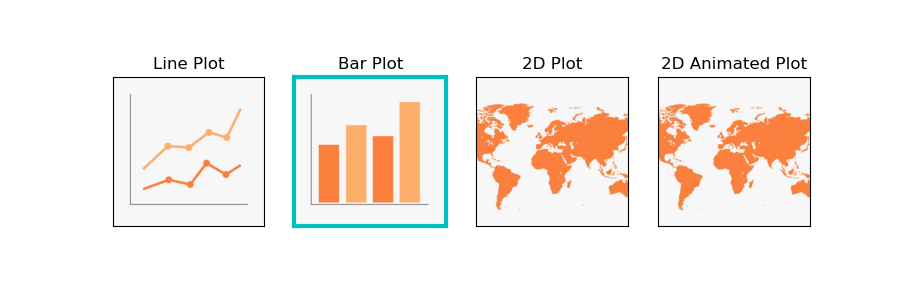

In [10]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

image_files=list((Path.cwd()/'images_gui').glob('*'))

plot_types = ['Line Plot', 'Bar Plot', '2D Plot', '2D Animated Plot']

fig1 = plt.imread( [f for f in image_files if 'Line' in f.name][0]  )
fig2 = plt.imread( [f for f in image_files if 'Bar' in f.name][0]   )
fig3 = plt.imread( [f for f in image_files if 'World' in f.name][0] )

figtot, axs = plt.subplots(1,4,figsize = (9,3))
# [ax.axis('off') for ax in axs]
# ICON_PLAY =  plt.imread('https://i.stack.imgur.com/ySW6o.png')
# ICON_PAUSE = plt.imread("https://i.stack.imgur.com/tTa3H.png")
# button_axes = plt.axes([0.3, 0.3, 0.4, 0.4])
button1  = Button(axs[0], '', image=fig1)
button2  = Button(axs[1], '', image=fig2)
button3  = Button(axs[2], '', image=fig3[:,200:864,:])
button4  = Button(axs[3], '', image=fig3[:,200:864,:])

t1 = axs[0].set_title(plot_types[0])
t2 = axs[1].set_title(plot_types[1])
t3 = axs[2].set_title(plot_types[2])
t4 = axs[3].set_title(plot_types[3])

def select_box(axis):
    TOTAL_CONFIG.update({'plot_type':axis.get_title()})
    write_config(TOTAL_CONFIG, file = DEFAULT_CONFIG_FILE)
    [axis.spines[l].set_color('c') for l in axis.spines]
    [axis.spines[l].set_linewidth(3) for l in axis.spines]

def unselect_box(axis):
    [axis.spines[l].set_color('k') for l in axis.spines]
    [axis.spines[l].set_linewidth(0.8) for l in axis.spines]

def onclick_b1(event):
    select_box(axs[0])
    unselect_box(axs[1])
    unselect_box(axs[2])
    unselect_box(axs[3])
    figtot.canvas.draw_idle()
def onclick_b2(event):
    unselect_box(axs[0])
    select_box(axs[1])
    unselect_box(axs[2])
    unselect_box(axs[3])
    figtot.canvas.draw_idle()
def onclick_b3(event):
    unselect_box(axs[0])
    unselect_box(axs[1])
    select_box(axs[2])
    unselect_box(axs[3])
    figtot.canvas.draw_idle()
def onclick_b4(event):
    unselect_box(axs[0])
    unselect_box(axs[1])
    unselect_box(axs[2])
    select_box(axs[3])
    figtot.canvas.draw_idle()
    
    
nn = [it for it, f in enumerate(plot_types) if f==TOTAL_CONFIG['plot_type']]
if nn:
    select_box(axs[nn[0]])

button1.on_clicked(onclick_b1)
button2.on_clicked(onclick_b2)
button3.on_clicked(onclick_b3)
button4.on_clicked(onclick_b4)
None
# def play(event):
#     button_axes.images[0].set_data(ICON_PAUSE)
#     figtot.canvas.draw_idle()

# button_axes = plt.axes([0.3, 0.3, 0.4, 0.4])
# start_button = Button(button_axes, '', image=ICON_PLAY)
# start_button.on_clicked(play)
# plt.show()

<h1 align="center">RESULTS<h1>

In [11]:
import time
import sys
from matplotlib.dates import DateFormatter
import base64
import hashlib
from typing import Callable
from IPython.display import HTML, display, FileLink

sys.path.append("..")
from PostGIS.GfasActivityReader import GfasActivityReader

from matplotlib.animation import FuncAnimation
import mapclassify as mc
import numpy as np
from IPython import display as ipydisplay

out = ipywd.Output()
display(out)

class DownloadButton(ipywd.Button):
    
    """Download button with dynamic content

    The content is generated using a callback when the button is clicked.
    """
    
    """This code is originally from 'ollik1', 
    posted in https://stackoverflow.com/questions/61708701/how-to-download-a-file-using-ipywidget-button
    
    on Aug 6, 2021
    """
    def __init__(self, filename: str, contents: Callable[[], str], **kwargs):
        super(DownloadButton, self).__init__(**kwargs)
        self.filename = filename
        self.contents = contents
        self.on_click(self.__on_click)

    def __on_click(self, b):
        contents: bytes = self.contents().encode('utf-8')
        b64 = base64.b64encode(contents)
        payload = b64.decode()
        digest = hashlib.md5(contents).hexdigest()  # bypass browser cache
        id = f'dl_{digest}'
#         text22.value = f"\t DOWNLOADING!"
        with out:
            display(HTML(f"""
<html>
<body>
<a id="{id}" download="{self.filename}" href="data:text/csv;base64,{payload}" download>
</a>

<script>
(function download() {{
document.getElementById('{id}').click();
}})()
</script>

</body>
</html>
"""))

Output()

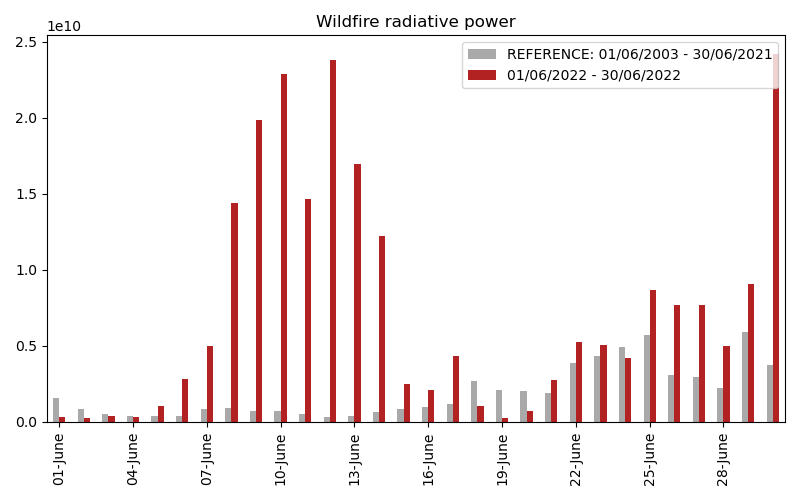

In [12]:
# global fig_sol, ax_sol
def clear_line(n=1):
    LINE_UP = '\033[1A'
    LINE_CLEAR = '\x1b[2K'
    for i in range(n):
        print(LINE_UP, end=LINE_CLEAR)

def confirm_selections(conf):
    dictionary_sessions = {
        'geometry': 'STEP1: Geographical selection',
        'specific_start_date' : 'STEP2: Specific period(s) of interest',
        'specific_end_date': 'STEP2: Specific period(s) of interest',
        'resolution': 'STEP2: Specific period(s) of interest',
#         'reference_date_start',
#         'reference_date_end',
        'variable':'STEP4: Variables', 
        'plot_type':'STEP5: PLOTS',
    }
    for tt,key in enumerate(conf.keys()):
            if conf[key] == '':
                if key in dictionary_sessions.keys():
                    sect = dictionary_sessions[key]
                    clear_line(200)
                    text.value = f"The field '{key}' is missing and it is necessary! please fill it in in section '{sect}' before continuing..."
                    return None
    return True

def plot_lineplot(data, ax):
    ddoy = data.groupby(data.index.dayofyear)
    quantiles = [0, 0.1, 0.25, .5, .75, 0.9, 1]
    for p in quantiles:
        d = ddoy.quantile(p)
        d.rename(columns={c: f'p={p}%-{c}' for c in d.columns}, inplace=True)
        d.index = [pd.to_datetime(f'2000{f:03d}', format = '%Y%j') for f in d.index]
        if quantiles.index(p) == 0:
            ax = d.plot(ax=ax)
        else:
            d.plot(ax=ax)
    dfmt = DateFormatter("%d-%b") # proper formatting Year-month-day
    ax.xaxis.set_major_formatter(dfmt)
    return ax

def plot_barplot(datanew, ax, resolution = TOTAL_CONFIG['resolution'], title = None):
    if title is None:
        title = f"{TOTAL_CONFIG['variable']}"
    
    datanew.plot.bar(ax=ax, color = ['#A9A9A9','#B22222','y'])
    if resolution =='daily': # for daily data
        ax.set_xticklabels([f'{pd.Timestamp(f.get_text()).day:02d}-{pd.Timestamp(f.get_text()).month_name()}' for f in ax.get_xticklabels()])
        ax.locator_params(axis='x', nbins=12)
    else:
        ax.set_xticklabels([f'{pd.Timestamp(f.get_text()).month_name()}' for f in ax.get_xticklabels()])
    
    ax.set_title(title)    
    return ax


def plot2dbackground(ax):
    bb = TOTAL_CONFIG['geometry']
    elem = gpd.GeoDataFrame(geometry = [bb], crs = 'EPSG:4326')
    ax = elem.boundary.plot(ax=ax, zorder = 0, color = 'grey', alpha = 1, lw = 0.7)
    ax = all_shapes.boundary.plot(ax=ax, color = 'grey', alpha =0.8, lw = 0.2)
    
    #extract limits
    ll = max(bb.bounds[2]-bb.bounds[0], bb.bounds[3]-bb.bounds[1])
    ## new squared geometry
    bbnew = box(bb.centroid.x-ll/2,bb.centroid.y-ll/2,bb.centroid.x+ll/2,bb.centroid.y+ll/2)
    xmin,ymin,xmax, ymax = bbnew.buffer(2).bounds
    ## set limits new
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    
    return ax

def plot_2dplot(datanew, ax, operation = 'sum', title = None, background = True, vmin=None, vmax=None, scheme='quantiles', classification_kwds=None):
#     stime = time.time()
    
    table_name = table_database[TOTAL_CONFIG['variable']][1]
    unit_meas  = table_database[TOTAL_CONFIG['variable']][2]
    name_ext   = TOTAL_CONFIG['variable']
    
    column_name_to_plot = datanew.columns[0]#f"{table_name.replace('_data','')}_{operation}"
    st, en = datanew.columns[0].split(' - ')
    st = st.split('_')[-1]
    if title is None:
        title = f"{name_ext}\n '{operation}' from {st} to {en}"
    legend_name = f"{table_name} [{unit_meas.replace('/day','')}]"
    
    if background:
        ax = plot2dbackground(ax)
        
    datanew.plot(column_name_to_plot,
                 ax=ax, 
                 cmap='OrRd',#'RdYlBu_r', 
                 vmin = vmin, vmax = vmax,
                 legend=True, scheme=scheme,
                 k= 10,
                 classification_kwds=classification_kwds,
                 legend_kwds = dict(
                     loc='center left', 
                     bbox_to_anchor=(1, 0.5),
                     title = legend_name, fmt = '{:.1e}')
                  )
    ax.set_title(title)
    fig = ax.get_figure()
    fig.tight_layout()
    # correction: remove for first element of the legend which is always [-inf, 0]
    return ax

def select_plot_type(plot_type, data_to_plot, operation = 'sum'):
    fig_sol, ax_sol = plt.subplots(figsize = (8,5))
    fig_sol.tight_layout()
    if plot_type == 'Line Plot':
        ax_sol = plot_lineplot(data_to_plot, ax_sol)
    elif plot_type == 'Bar Plot':
        ax_sol = plot_barplot(data_to_plot, ax_sol, resolution = TOTAL_CONFIG['resolution'])
    elif plot_type == '2D Plot':
        ax_sol = plot_2dplot(data_to_plot, ax_sol, operation = operation)
    else:
        ax_sol.set_title('The plot type in the configuration file was not CLEAR!', fontsize = 20)
    return fig_sol, ax_sol


def adapt_resolution(data_or, resolution = TOTAL_CONFIG['resolution']):

    if resolution =='monthly':
        datanew = data_or.groupby([data_or.index.month,data_or.index.year]).mean()
        datanew.index = [pd.Timestamp(day = 1, month = f[0], year = f[1]) for f in datanew.index.values]
        datanew = datanew.sort_index()

    if resolution=='weekly':
        datanew = data_or.groupby(data_or.index.strftime('%Y-%U')).mean()
        datanew.index = [pd.to_datetime(f'{f[0:4]}-{(int(f[-2::]))*7+1}', format='%Y-%j') for f in datanew.index]
        datanew = datanew.sort_index()
    
    if resolution=='daily':
        datanew = data_or # they are already at a daily resolution\
    
#     text.value = f"\t TO {resolution} - {len(data_or.index)} - {len(datanew.index)}"
#     time.sleep(2)
    return datanew

def check_data(index, reference_period = False):
    if reference_period:
        st_string, end_string = 'reference_start_date', 'reference_end_date'
    else:
        st_string, end_string = 'specific_start_date', 'specific_end_date'
    ########## CHECK on extension of the data
    if index.values[0]!= pd.to_datetime(TOTAL_CONFIG[st_string], format = '%d-%m-%Y'):
        # modify start date according to available data
        pp = pd.Timestamp(index.values[0])
        old_d = TOTAL_CONFIG[st_string]
        TOTAL_CONFIG[st_string] = f"{pp:%d-%m-%Y}"
        print(f"changing {st_string} from {old_d} to {pp:%d-%m-%Y}")
    if index.values[-1]!= pd.to_datetime(TOTAL_CONFIG[end_string], format = '%d-%m-%Y'):
        # modify end date according to available data
        pp = pd.Timestamp(index.values[-1])
        old_d = TOTAL_CONFIG[end_string]
        TOTAL_CONFIG[end_string] = f"{pp:%d-%m-%Y}"
        print(f"changing {end_string} from {old_d} to {pp:%d-%m-%Y}")
    write_config()

def extract_data(adapt_resolution_option = True, 
                 start_date = TOTAL_CONFIG['specific_start_date'], 
                 end_date = TOTAL_CONFIG['specific_end_date'], 
                 function_to_aggregate = 'sum', 
                 keep_separate_dates = False,
                 reference_period = False):
    
    if confirm_selections(TOTAL_CONFIG):
        table_name = table_database[TOTAL_CONFIG['variable']][1]
        db = GfasActivityReader()
        polygon = TOTAL_CONFIG['geometry']
        minx, miny,maxx, maxy = polygon.bounds
        start_date = dt.datetime.strptime(start_date,'%d-%m-%Y')
        end_date   = dt.datetime.strptime(end_date,'%d-%m-%Y')
        if start_date>end_date:
            text.value = f'INVALID SPECIFIC PERIOD: start after end. Start={start_date:%d-%m-%Y}, End={end_date:%d-%m-%Y}'
            return None
        if '2D' in TOTAL_CONFIG['plot_type']: # index are now 'clust' 'x_y' info
            data_or, data = db.extract_data_polygon(table_name, start_date, end_date, polygon,
                                                    agg_operations = [function_to_aggregate],
                                                    resolution = 0.1, keep_separate_dates = keep_separate_dates)
            if data.empty:
                return data
            adapt_resolution_option = False
#             check_data(data_or.index, reference_period = False)
            start_date, end_date   = data_or.index[0], data_or.index[-1]
        else:
            data = db.extract_data2(start_date, end_date, polygon, table_name, agg_operation = function_to_aggregate)
            if data.empty:
                return data
#             check_data(data.index, reference_period = reference_period)
            start_date, end_date   = data.index[0], data.index[-1]
            #data = db.extract_data(start_date, end_date, minx, miny,maxx, maxy)
            months_abbreviations = {'January':'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr', 'May':   'May', 'June':  'Jun', 'July' : 'Jul', 'August':'Aug', 'September': 'Sept', 'October'  : 'Oct', 'November' : 'Nov', 'December' : 'Dec'}
            # AVERAGE SAME DAY OF DIFFERENT YEAR TOGETHER
            if not keep_separate_dates:
                data = data.groupby([f'{dd:02d}-{mm:02d}' for dd, mm in zip(data.index.day, data.index.month)]).mean()
                data.index = [pd.Timestamp(year = 2220, day = int(f[0:2]), month = int(f[3::])) for f in data.index]
                data.index = pd.DatetimeIndex(data.index)
        data.columns = [f"{start_date.day:02d}/{start_date.month:02d}/{start_date.year} - {end_date.day:02d}/{end_date.month:02d}/{end_date.year}" if (f!='geometry') else 'geometry' for f in data.columns]
        
        if adapt_resolution_option:
            return adapt_resolution(data.copy(), resolution = TOTAL_CONFIG['resolution'])
        else:
            return data.copy()
        
def plot_config(all_data, operation = 'sum'):     
#     ax.cla()
    if all_data.empty:
        text.value = '3. NO DATA FOUND FOR THE SELECTED REGION'
        return 
    text.value = '2. Creating Plot'
    fig, ax = select_plot_type(TOTAL_CONFIG['plot_type'], all_data, operation = operation)
    #     ax.set_title(f"{TOTAL_CONFIG['plot_type']} - {TOTAL_CONFIG['resolution']}", fontsize = 16)
    text.value = f"3. FINISHED PLOT!"
#     fig.tight_layout()
#     fig.canvas.draw_idle()
    return fig, ax 

tb = ipywd.ToggleButton(value=False,disabled=False, description = 'PRESS TO CREATE PLOT', tootltip = 'press to compute the plot', icon = 'arrow-circle-right',
                 layout={'width': 'initial','description_width': 'initial', 'height':'60 px'})
out2   = ipywd.Output(layout={'border': '1px solid black'})

def animate_plot_2dplot(operator = 'sum'):
    """Create an animation of the defined area"""
    text.value = '1. Extracting DATA'
    all_days = extract_data(start_date = TOTAL_CONFIG['specific_start_date'], 
                            end_date = TOTAL_CONFIG['specific_end_date'], 
                            function_to_aggregate = operator,
                            keep_separate_dates = True, 
                            reference_period = False)
    scheme="User_Defined"
    val_min = all_days.iloc[:,0].min()
    val_max = all_days.iloc[:,0].max()
    classification_kwds=dict(bins=mc.Quantiles(all_days.iloc[:,0]).bins)
#                              np.concatenate([[val_min], mc.Quantiles(all_days.iloc[:,0]).bins]))
    indd = []
    for days in all_days.index.get_level_values(0).drop_duplicates():
        indd.append(days)
    pp = all_days.loc[[indd[0]],:]
    
    fig_sol, ax_sol = plt.subplots(figsize = (8,5))
    fig_sol.tight_layout()
    
    plot_2dplot(pp, ax_sol, title = f"{TOTAL_CONFIG['variable']}\n{days.day:02d}-{days.month:02d}-{days.year}",
                scheme=scheme, classification_kwds=classification_kwds,
                )
    def animate(frame_num):
        text.value = f'2. Creating video {frame_num+1}/{len(indd)} completed'
        days = indd[frame_num]
        plot_2dplot(all_days.loc[days,:],
                    ax=ax_sol,
                    title = f"{TOTAL_CONFIG['variable']}\n{days.day:02d}-{days.month:02d}-{days.year}", 
                    background=False,scheme=scheme, classification_kwds=classification_kwds,
                   )
        return ax_sol
    plt.close()
    anim = FuncAnimation(fig_sol, animate, frames=len(indd), interval=250)
    video = anim.to_html5_video()
    with out2:
        html = ipydisplay.HTML(video)
        ipydisplay.display(html, clear= True )
    return all_days

def selection(event):
    if event.new:
        try:
            TOTAL_CONFIG = read_config()
            aggregating_operation = TOTAL_CONFIG['aggregating_operation']#'sum'
            var = table_database[TOTAL_CONFIG['variable']][1] 

            if TOTAL_CONFIG['plot_type'] =='2D Animated Plot':
                data_to_save = animate_plot_2dplot(operator = aggregating_operation)
                filename_dwnd = f"everydayay_data_{var}__S{TOTAL_CONFIG['specific_start_date'].replace('-','')}-{TOTAL_CONFIG['specific_end_date'].replace('-','')}.csv"
            else:
                text.value = '1. Extracting DATA'
                data_to_plot = extract_data(start_date = TOTAL_CONFIG['specific_start_date'],
                                            end_date = TOTAL_CONFIG['specific_end_date'],
                                            function_to_aggregate = aggregating_operation)

                # TOTAL_CONFIG['variable'].split('(')[1].split(')')[0]
                filename_dwnd = f"data_{var}__S{TOTAL_CONFIG['specific_start_date'].replace('-','')}-{TOTAL_CONFIG['specific_end_date'].replace('-','')}.csv"
                #ADD reference period
                if (TOTAL_CONFIG['reference_start_date']!='') & (TOTAL_CONFIG['reference_end_date']!='') & (TOTAL_CONFIG['plot_type'] !='2D Plot'):
                    text.value = '1. Extracting REFERENCE DATA'
                    reference_data = extract_data(start_date = TOTAL_CONFIG['reference_start_date'],
                                                  end_date = TOTAL_CONFIG['reference_end_date'],
                                                  reference_period = True,
                                                  function_to_aggregate = aggregating_operation
                                                 )
                    reference_data.rename(columns={c: f'REFERENCE: {c}' for c in reference_data.columns}, inplace=True)
                    data_to_plot   = pd.merge( reference_data,data_to_plot, left_index=True, right_index=True)
                    filename_dwnd = filename_dwnd.replace(".csv",f"__R{TOTAL_CONFIG['reference_start_date'].replace('-','')}-{TOTAL_CONFIG['reference_end_date'].replace('-','')}.csv")

#                 data_to_plot.columns = [f'{aggregating_operation}_{nn}' if nn!='geometry' else nn for nn in data_to_plot.columns]

                data_to_plot   = data_to_plot.sort_index()
                fig_sol, ax_sol = plot_config(data_to_plot, operation = aggregating_operation)

                data_to_save   = data_to_plot.copy()
                if TOTAL_CONFIG['plot_type'] !='2D Plot':
                    data_to_save.index = [f"{dd.day:02d}-{dd.strftime('%b')}" for dd in data_to_save.index]
                with out2:
                    fig_sol.tight_layout()
                    ipydisplay.display(fig_sol.canvas, clear= True)

            #DOWNLOAD BUTTON APPEARS!
            db.filename = filename_dwnd
            db.contents = lambda: data_to_save.to_csv()
            db.disabled = False
            time.sleep(2)            
            tb.value = False
        
        except Exception as e:
            with out2:
                raise e
                
    else:
        text.value = 'Change config and press again for another plot'
#     print(event.value)

tb.observe(selection, names = 'value') 
db = DownloadButton(filename='empty.csv', contents=lambda: 'empty', disabled = True, 
                    description='Download into csv',
                    style = {'description_width': 'initial'},
                    icon = 'download')

text   = ipywd.Label(' ')
# text22 = ipywd.Label(' ')

table1 = ipywd.HBox([tb, text])
table2 = ipywd.VBox([db, out2])
table  = ipywd.VBox([table1,table2])
display(table)

# fig_sol.set_visible(False)
# plt.draw()
# plt.close(fig = fig_sol)